In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("50_Startups.csv")

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Each column contain 50 values and there are no null values. No cleaning is required.

In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Information of 50 startups are collected on 5 different fields R&D Spend, Administration, Marketing Spend, State and Profit.

In [7]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Startups are located at three different states.

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### R&D Spend

In [9]:
rnd = df['R&D Spend']

In [10]:
rnd.skew()

0.164002172321177

C:\Users\KP\mambaforge\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


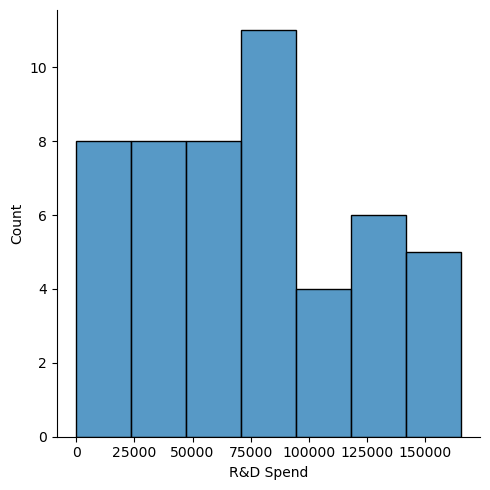

In [11]:
sns.displot(data=rnd)

R&D spend is slightly positively skewed seen from skewness calculation and distribution plot also.

In [12]:
df[['Profit', 'R&D Spend']].corr()

,Profit,R&D Spend
Profit,1.0000,0.9729
R&D Spend,0.9729,1.0000


<Axes: xlabel='R&D Spend', ylabel='Profit'>

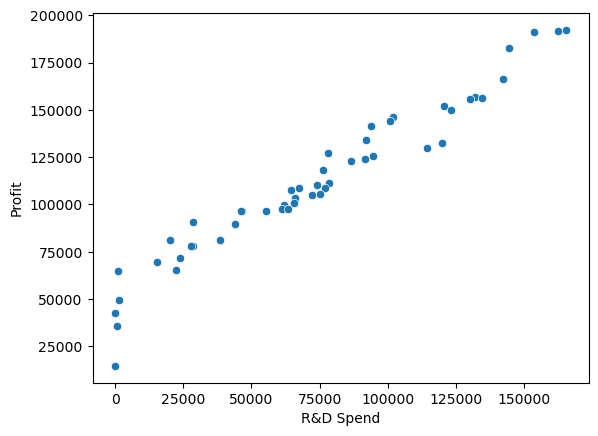

In [13]:
sns.scatterplot(y="Profit", x='R&D Spend', data=df)

There is a strong linear correlation between profit and R&D spend for startups with profit more than \\$ 75000. Also, startups with profit lesser than \\$ 75000 don't spend money on R&D.

<Axes: xlabel='R&D Spend', ylabel='Profit'>

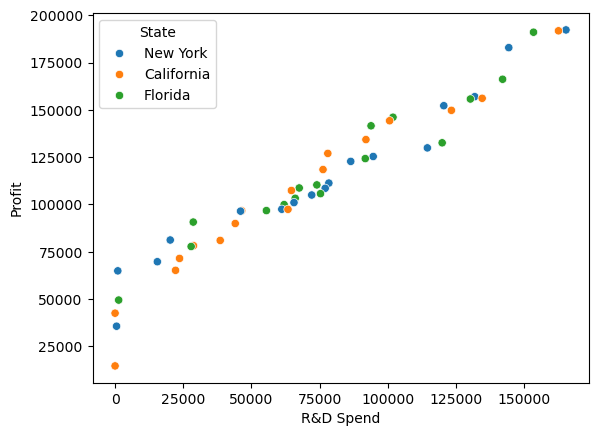

In [14]:
sns.scatterplot(y="Profit", x='R&D Spend', data=df, hue="State")

All three states shows same pattern.

### Administration Spend

In [15]:
ad = df['Administration']
ad.describe()

count        50.000000
mean     121344.639600
std       28017.802755
min       51283.140000
25%      103730.875000
50%      122699.795000
75%      144842.180000
max      182645.560000
Name: Administration, dtype: float64

In [16]:
ad.skew()

-0.4890248099671768

C:\Users\KP\mambaforge\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


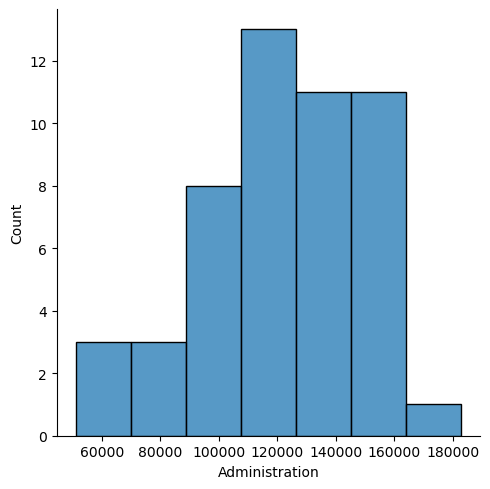

In [17]:
sns.displot(data=ad)

Administration spends are negatively skewed. Therfore more startups spend more than average in Administration.

In [18]:
df[['Profit', 'Administration']].corr()

,Profit,Administration
Profit,1.000000,0.200717
Administration,0.200717,1.000000


<Axes: xlabel='Administration', ylabel='Profit'>

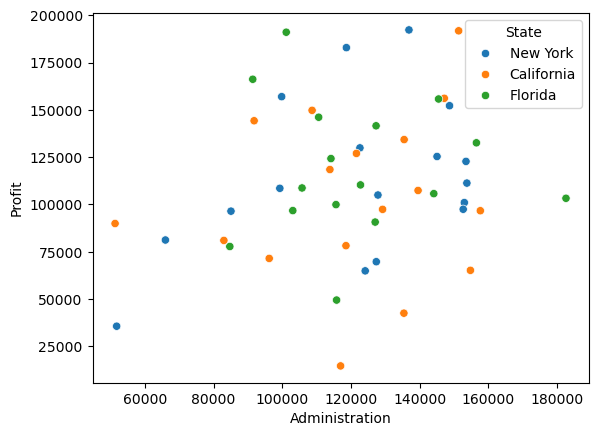

In [19]:
sns.scatterplot(y="Profit", x='Administration', data=df, hue="State")

Unlike R&D spends, Administration spends are unrelated to the profit of the startup. It is prevalent in all three states.

### Marketing Spend

In [20]:
mark = df['Marketing Spend']
mark.describe()

count        50.000000
mean     211025.097800
std      122290.310726
min           0.000000
25%      129300.132500
50%      212716.240000
75%      299469.085000
max      471784.100000
Name: Marketing Spend, dtype: float64

In [21]:
mark.skew()

-0.04647226758360412

C:\Users\KP\mambaforge\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


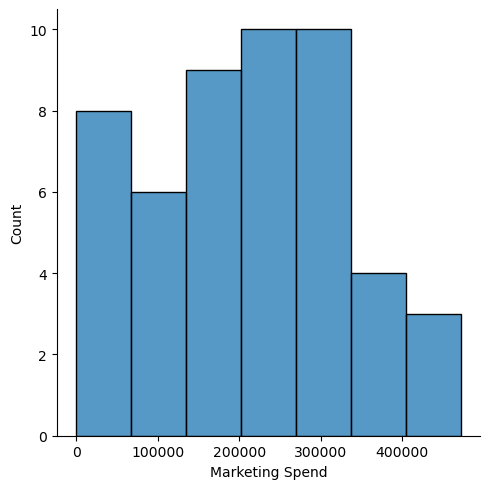

In [22]:
sns.displot(data=mark)

Marketing Spends are least skewed data, but still very small negatively skewed data.

In [23]:
df[['Profit', 'Marketing Spend']].corr()

,Profit,Marketing Spend
Profit,1.000000,0.747766
Marketing Spend,0.747766,1.000000


<Axes: xlabel='Marketing Spend', ylabel='Profit'>

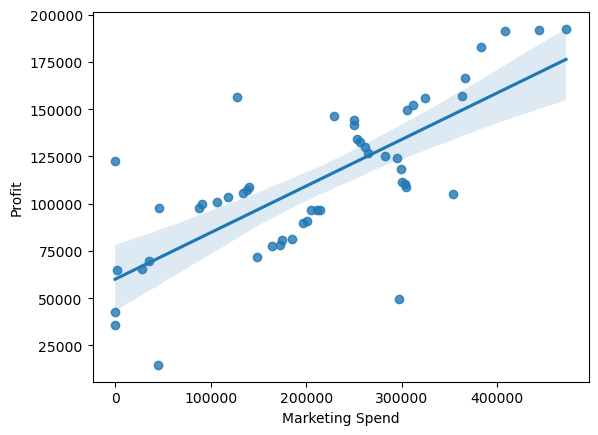

In [24]:
sns.regplot(y="Profit", x='Marketing Spend', data=df)

Points are below line for smaller values of profit, whereas more points are above line for higher profit. Startups spend less on marketing when profits are low.

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

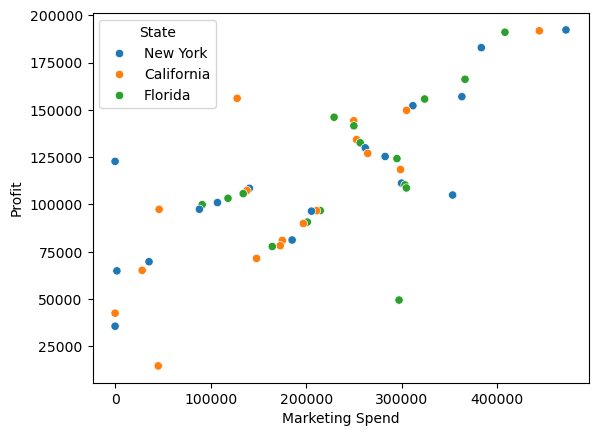

In [25]:
sns.scatterplot(y="Profit", x='Marketing Spend', data=df, hue='State')

## Model Building

In [26]:
##### Sampling the data  --- 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import joblib
from math import sqrt
import random

In [27]:
def regression_results(y_true, y_pred):
    mse=mean_squared_error(y_true, y_pred) 
    mae=mean_absolute_error(y_true, y_pred)
    r2=r2_score(y_true, y_pred)

    print('r2: ', round(r2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

Preparing dataset for multple linear regression

In [28]:
dummy = pd.get_dummies(df['State']).astype('int')

In [29]:
final_data = pd.concat([df,dummy],axis = 1)

Model using all three features included

In [30]:
df.drop("State", axis=1)
df = pd.get_dummies(df)

In [31]:
X = df.drop("Profit",axis=1)
y = df['Profit']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.75,random_state=1078)

In [33]:
model = LinearRegression()
all_trained = model.fit(X_train,y_train)

In [34]:
all_pred = all_trained.predict(X_test)

In [35]:
dm  = pd.DataFrame(all_pred, columns = ['Predicted'])
dm['Actual'] = y_test.values

In [36]:
print("The Strength of the Model is: ",r2_score(dm['Actual'], dm['Predicted']))

The Strength of the Model is:  0.9413262690696323


In [37]:
print("Mean Square Error is: ", sqrt(mean_squared_error(dm['Actual'], dm['Predicted'])))

Mean Square Error is:  9638.705300143665


In [38]:
print("Coefficeints and intercept\n")
for i, col in enumerate(X.columns[:3]):
    print(str(col), all_trained.coef_[i])
print("Intercept", all_trained.intercept_)

Coefficeints and intercept

R&D Spend 0.8304624027131123
Administration -0.05148853879811576
Marketing Spend 0.03509108868095619
Intercept 48564.757001921214


In [39]:
joblib.dump(all_trained, "all.sav")

['all.sav']

Looking for significance of individual features of profit.

### Profit and R&D Spend

In [40]:
X = final_data[['Profit', 'California', 'Florida', 'New York']]
y = final_data['R&D Spend']

In [41]:
seed = random.randint(1000, 10000)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.75,random_state=6026)

In [42]:
model = LinearRegression()
rnd_trained = model.fit(X_train,y_train)

In [43]:
rnd_pred = rnd_trained.predict(X_test)

In [44]:
dd  = pd.DataFrame(rnd_pred, columns = ['Predicted'])
dd['Actual'] = y_test.values

In [45]:
print("The Strength of the Model is: ",r2_score(dd['Actual'], dd['Predicted']))

The Strength of the Model is:  0.9747804433042089


In [46]:
print("Mean Square Error is: ", sqrt(mean_squared_error(dd['Actual'], dd['Predicted'])))

Mean Square Error is:  6989.613544912349


In [47]:
joblib.dump(rnd_trained, "rnd.sav")

['rnd.sav']

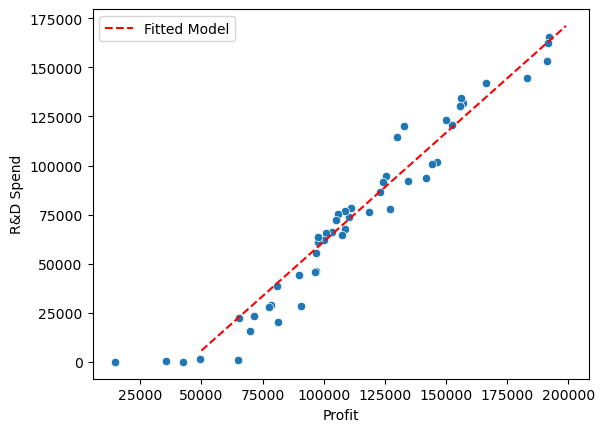

In [48]:
x_plt = np.arange(50000, 200000, 1000)
y_plt = x_plt*rnd_trained.coef_[0] + rnd_trained.intercept_
sns.scatterplot(x="Profit", y="R&D Spend", data=df)
plt.plot(x_plt, y_plt, c="r", linestyle="--", label="Fitted Model")
plt.legend()
plt.show()

### Profit and Marketing Spend

In [49]:
X = final_data[['Marketing Spend', 'California', 'Florida', 'New York']]
y = final_data["Profit"]

In [50]:
seed = random.randint(1000, 10000)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.75,random_state=1078)
seed

7892

In [51]:
model = LinearRegression()
mark_trained = model.fit(X_train,y_train)

In [52]:
mark_pred = mark_trained.predict(X_test)

In [53]:
dm  = pd.DataFrame(mark_pred, columns = ['Predicted'])
dm['Actual'] = y_test.values

In [54]:
print("The Strength of the Model is: ",r2_score(dm['Actual'], dm['Predicted']))

The Strength of the Model is:  0.7912229043567449


In [55]:
print("Mean Square Error is: ", sqrt(mean_squared_error(dm['Actual'], dm['Predicted'])))

Mean Square Error is:  18181.85858065492


In [56]:
joblib.dump(mark_trained, "marketing.sav")

['marketing.sav']

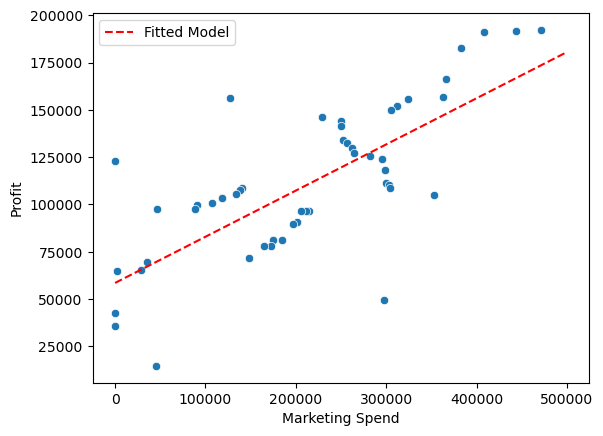

In [57]:
x_plt = np.arange(0, 500000, 1000)
y_plt = x_plt*mark_trained.coef_[0] + mark_trained.intercept_
sns.scatterplot(x="Marketing Spend", y="Profit", data=df)
plt.plot(x_plt, y_plt, c="r", linestyle="--", label="Fitted Model")
plt.legend()
plt.show()